In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
sb.set()
sb.set_style('whitegrid') 

In [39]:
data = pd.read_csv("complexDatasetHappyness.csv")

In [40]:
data.head()

,CountryName,RegionalIndicator,HappyScore,GDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [41]:
data.columns

Index(['CountryName', 'RegionalIndicator', 'HappyScore', 'GDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancy', 'FreedomToMakeLifeChoices',
       'Generosity', 'PerceptionsOfCorruption'],
      dtype='object')

In [42]:
datacomplex.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


In [43]:
data.describe()

,HappyScore,GDPperCapita,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [44]:
# lets see as to how clean is the dataset
data.isnull().sum()

CountryName                 0
RegionalIndicator           0
HappyScore                  0
GDPperCapita                0
SocialSupport               0
HealthyLifeExpectancy       0
FreedomToMakeLifeChoices    0
Generosity                  0
PerceptionsOfCorruption     0
dtype: int64

In [45]:
correl = data.corr()

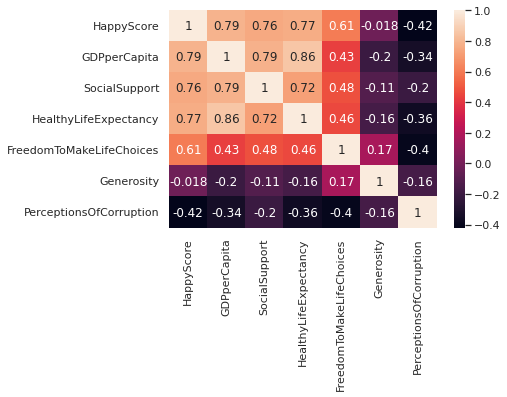

In [46]:
sb.heatmap(correl,xticklabels=correl.columns, yticklabels=correl.columns, annot=True)

From the above heatmap we are able to gague that the happynes score of a country is chiefly dependent on these componenets:

Strongly positively correlated:
*   GDP per capital (0.79)
*   Social Support (0.76)
*   Healthy Life expenctancy (0.77)

Significant negative correlation:
*   Perceptions of curruption (-0.42)

Beyond this, we see a significant positive correlation between the {GDP per capital, Social Support, Healthy Life expenctancy}. Let us investigate this further...

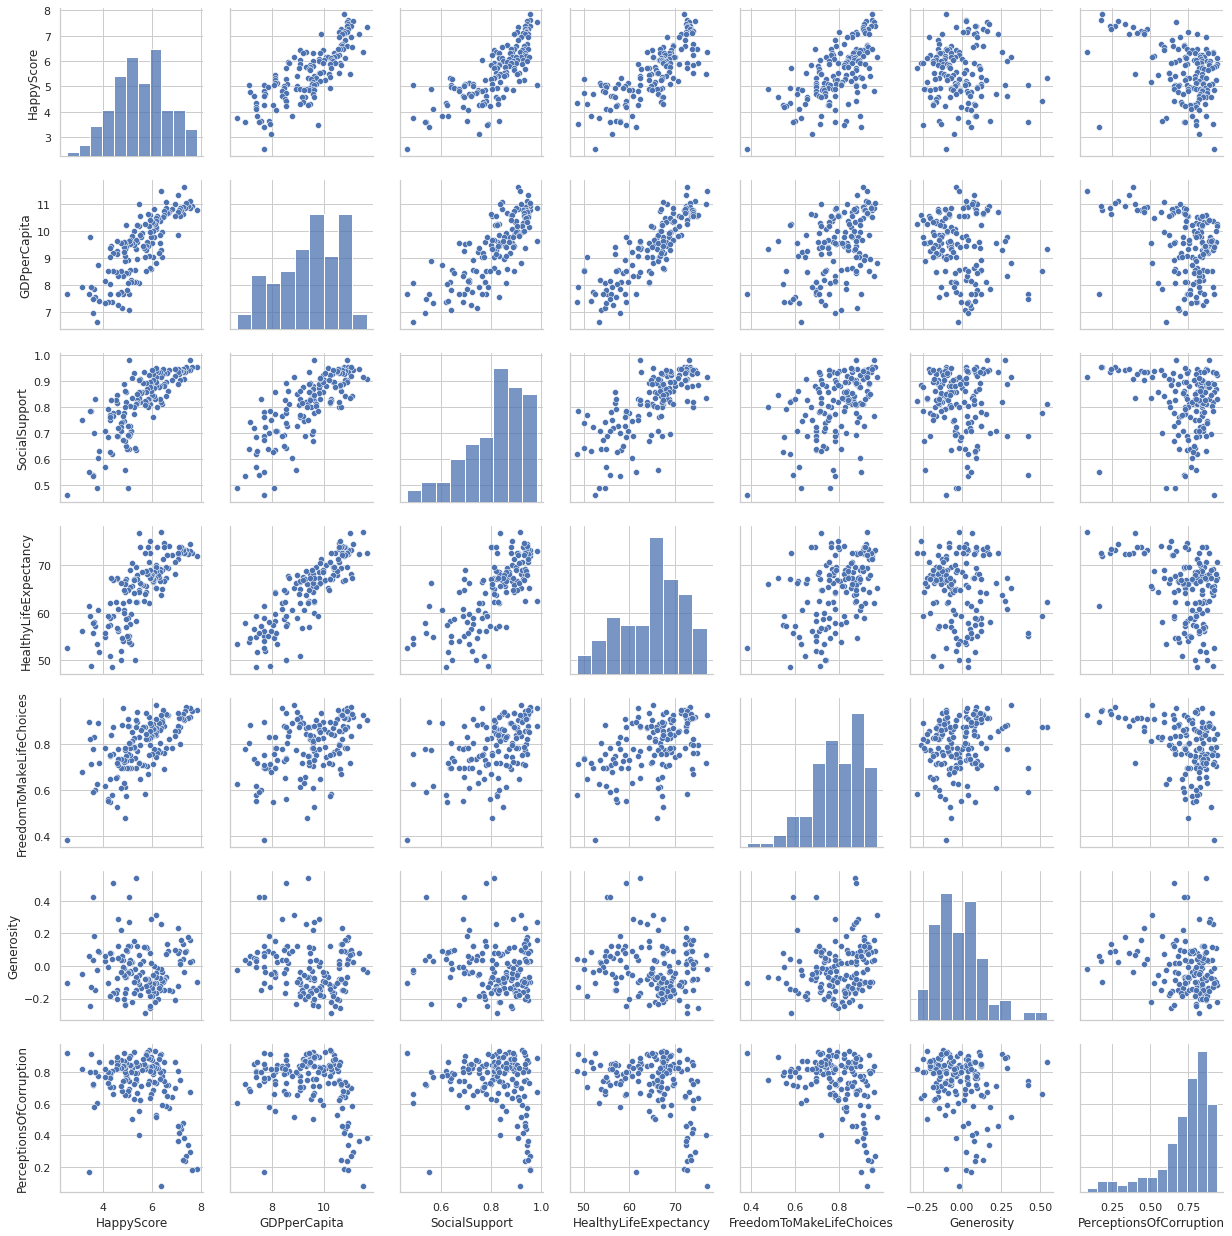

In [47]:
sb.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


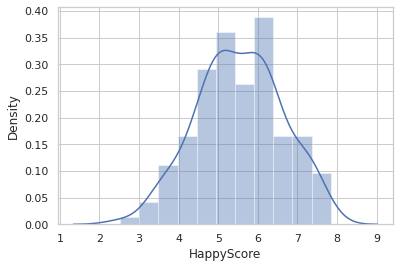

In [50]:
sb.distplot(data.HappyScore)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


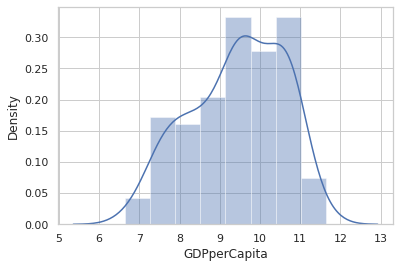

In [51]:
sb.distplot(data.GDPperCapita)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


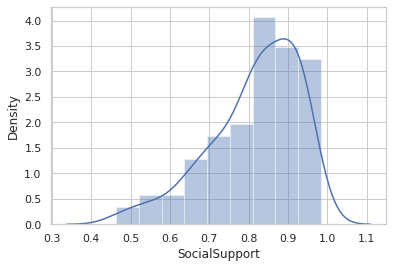

In [52]:
sb.distplot(data.SocialSupport)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


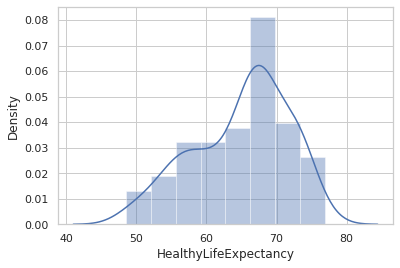

In [53]:
sb.distplot(data.HealthyLifeExpectancy)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


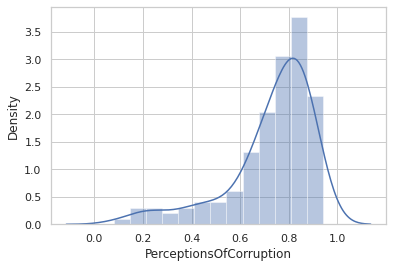

In [54]:
sb.distplot(data.PerceptionsOfCorruption)

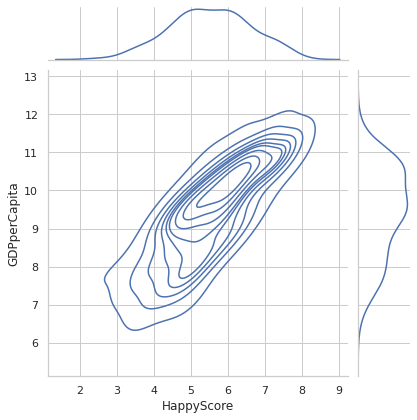

In [57]:
sb.jointplot(x="HappyScore", y="GDPperCapita", data=data, kind="kde")

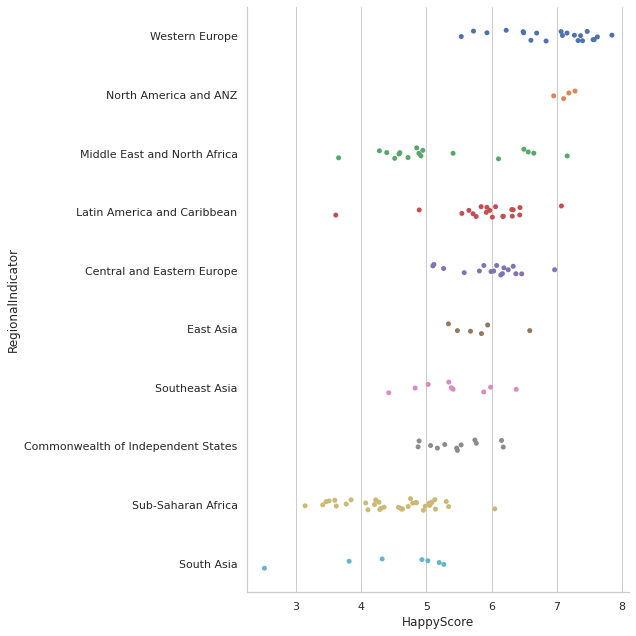

In [69]:
sb.catplot(y='RegionalIndicator', x = 'HappyScore', data = data, height= 9)

This graph graphically gives us an idea of which are the poorest regions, as well as how they lag behind in the happyness score. At higher end of the spectrum we have Europe, followed by NA; while on the other hand we have Sub-Saharan Africa and South Asia.

In [70]:
data.columns

Index(['CountryName', 'RegionalIndicator', 'HappyScore', 'GDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancy', 'FreedomToMakeLifeChoices',
       'Generosity', 'PerceptionsOfCorruption'],
      dtype='object')

Let us now investigate how the distribution of the significantly correlated factors are wrt the region within which the country is located

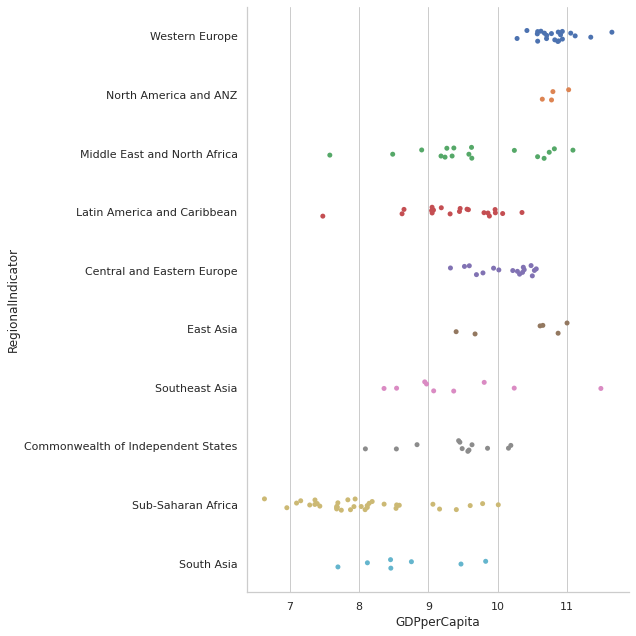

In [71]:
sb.catplot(y='RegionalIndicator', x = 'GDPperCapita', data = data, height= 9)

we see an anomaly wherein the South Asian countries despite being higher than most sub-saharan coutnries in terms of their GDP per capita, they still come within same happyness score bad as sub-saharan afcrican coutnries.

This could mean that despite their economic standing, there could be other factors leading the lower happyness score band of south asian countries

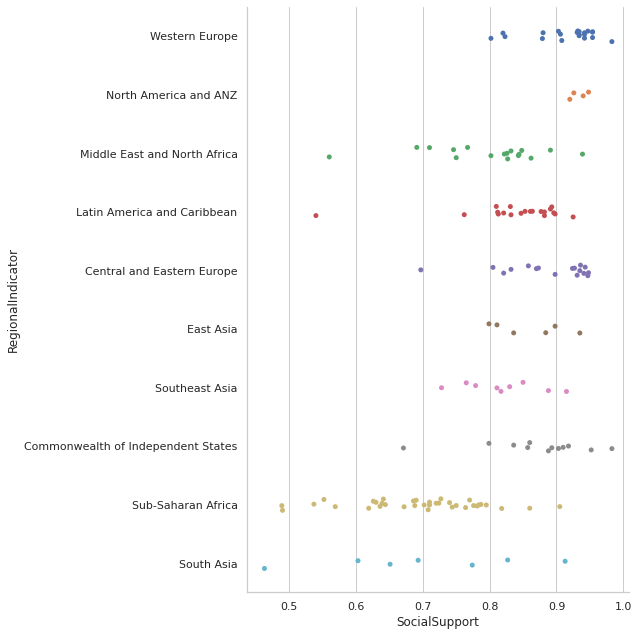

In [72]:
sb.catplot(y='RegionalIndicator', x = 'SocialSupport', data = data, height= 9)

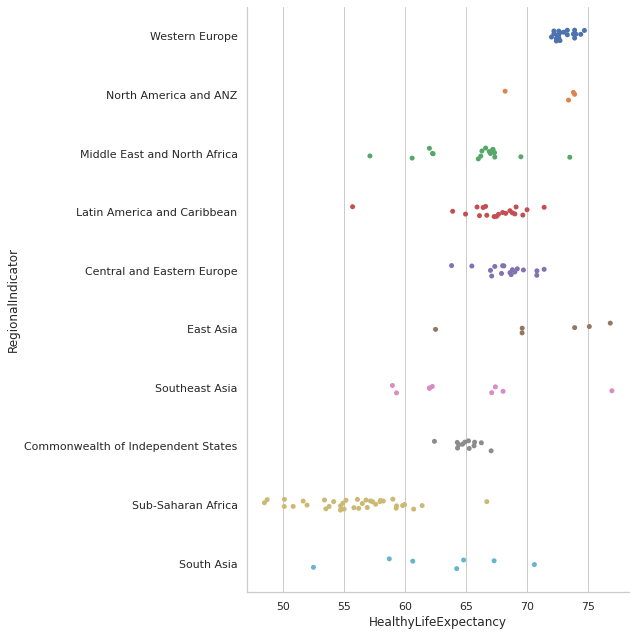

In [73]:
sb.catplot(y='RegionalIndicator', x = 'HealthyLifeExpectancy', data = data, height= 9)

We again see a bucking of the trend whernin the sub-saharan african countries have significantly lower healthy life expectancies. And despite this they in the comparable happy score band as south asian countries, which have significantly higher healthy life expectancy. 

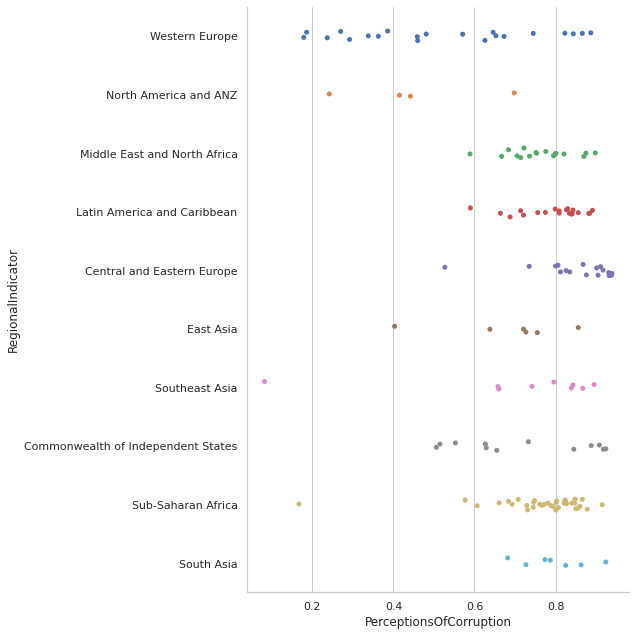

In [74]:
sb.catplot(y='RegionalIndicator', x = 'PerceptionsOfCorruption', data = data, height= 9)

We see a huge differntiator between western europe and NA, and the rest of the regions. We can see that the other contries are struggling to catch up with them on the currouptions parameter. This could have been the key differentior which endows western europe and NA with signficantly higher hapyness score, despuite them being in the same range band as middle east, lating america, central europe in the other parameters which we examined above(gdp, life span, social support).

In [75]:
data.columns

Index(['CountryName', 'RegionalIndicator', 'HappyScore', 'GDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancy', 'FreedomToMakeLifeChoices',
       'Generosity', 'PerceptionsOfCorruption'],
      dtype='object')

Let us examine the box plots to gague more inshights into the distributions of the data

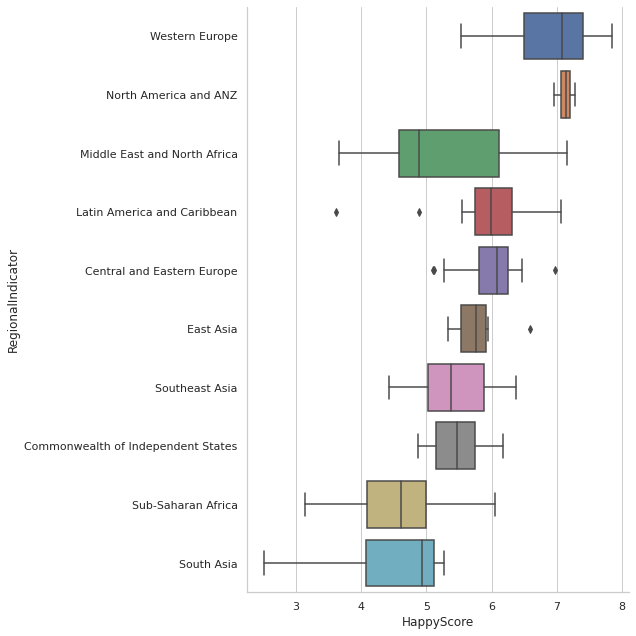

In [79]:
sb.catplot(y='RegionalIndicator', x = 'HappyScore', kind='box', data = data,height= 9 )

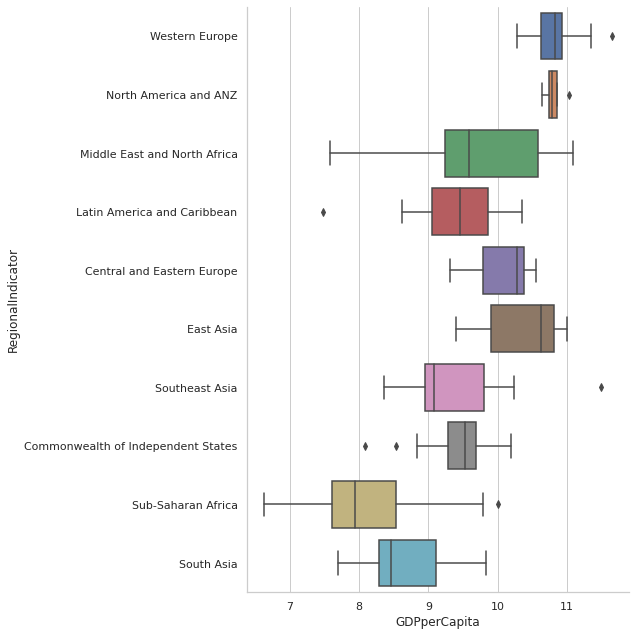

In [80]:
sb.catplot(y='RegionalIndicator', x = 'GDPperCapita', kind='box', data = data,height= 9 )

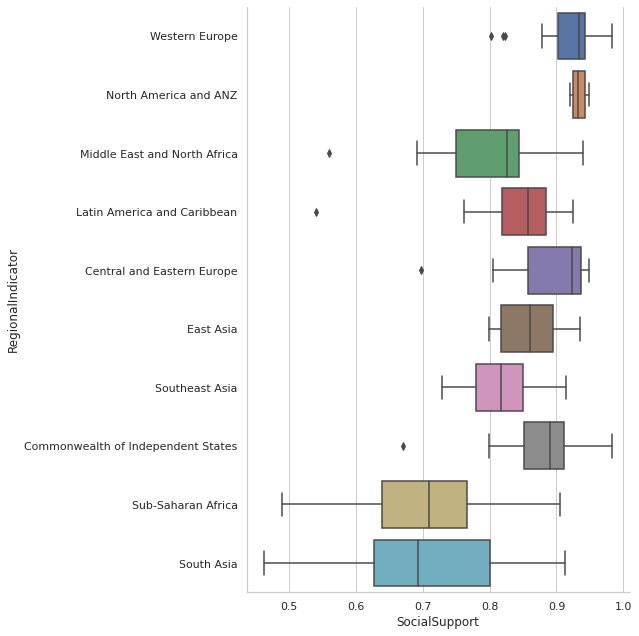

In [81]:
sb.catplot(y='RegionalIndicator', x = 'SocialSupport', kind='box', data = data,height= 9 )

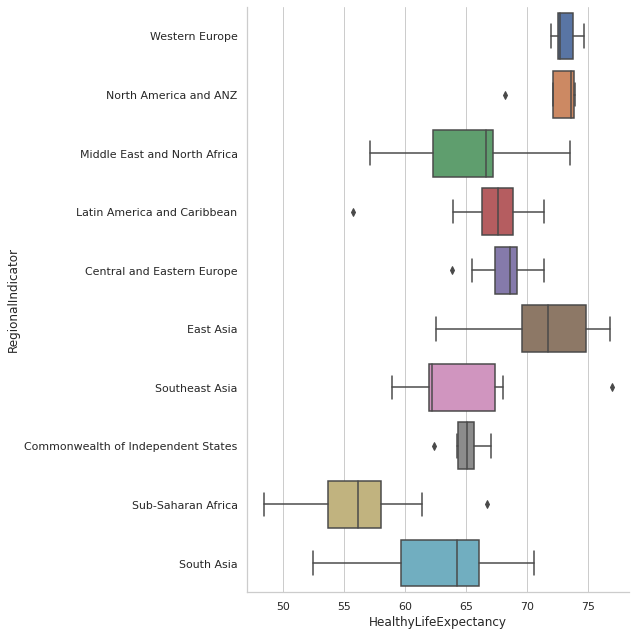

In [82]:
sb.catplot(y='RegionalIndicator', x = 'HealthyLifeExpectancy', kind='box', data = data,height= 9 )

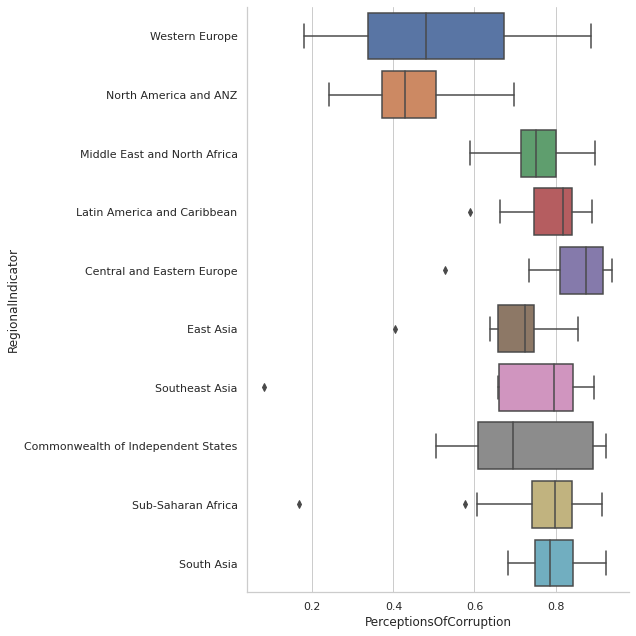

In [83]:
sb.catplot(y='RegionalIndicator', x = 'PerceptionsOfCorruption', kind='box', data = data,height= 9 )

Let us now explore the parameters by trying to color them according to the signfiicantly correlated parameters

In [87]:
data.columns

Index(['CountryName', 'RegionalIndicator', 'HappyScore', 'GDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancy', 'FreedomToMakeLifeChoices',
       'Generosity', 'PerceptionsOfCorruption'],
      dtype='object')

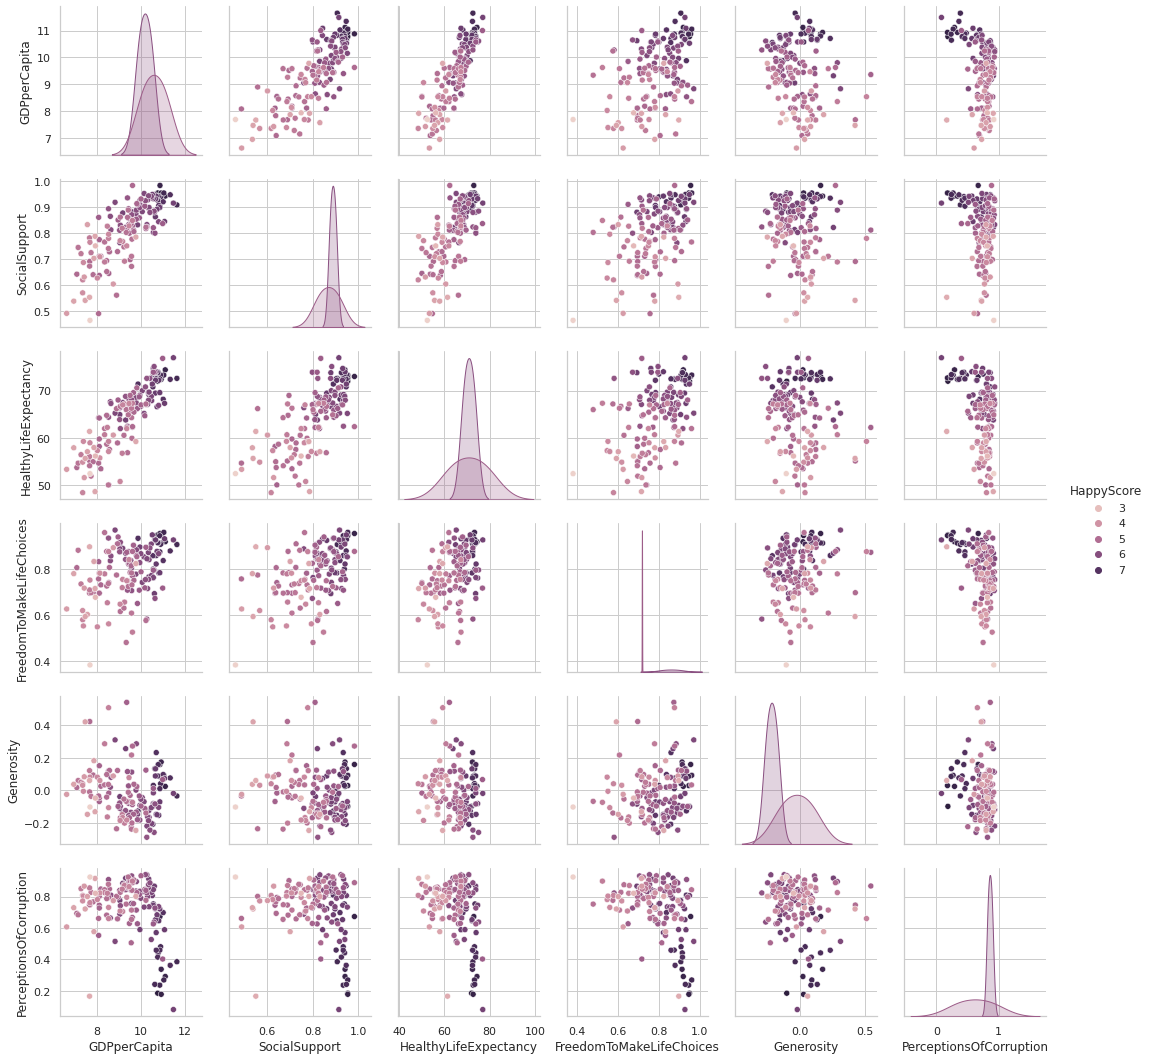

In [88]:
sb.pairplot(data, hue='HappyScore')

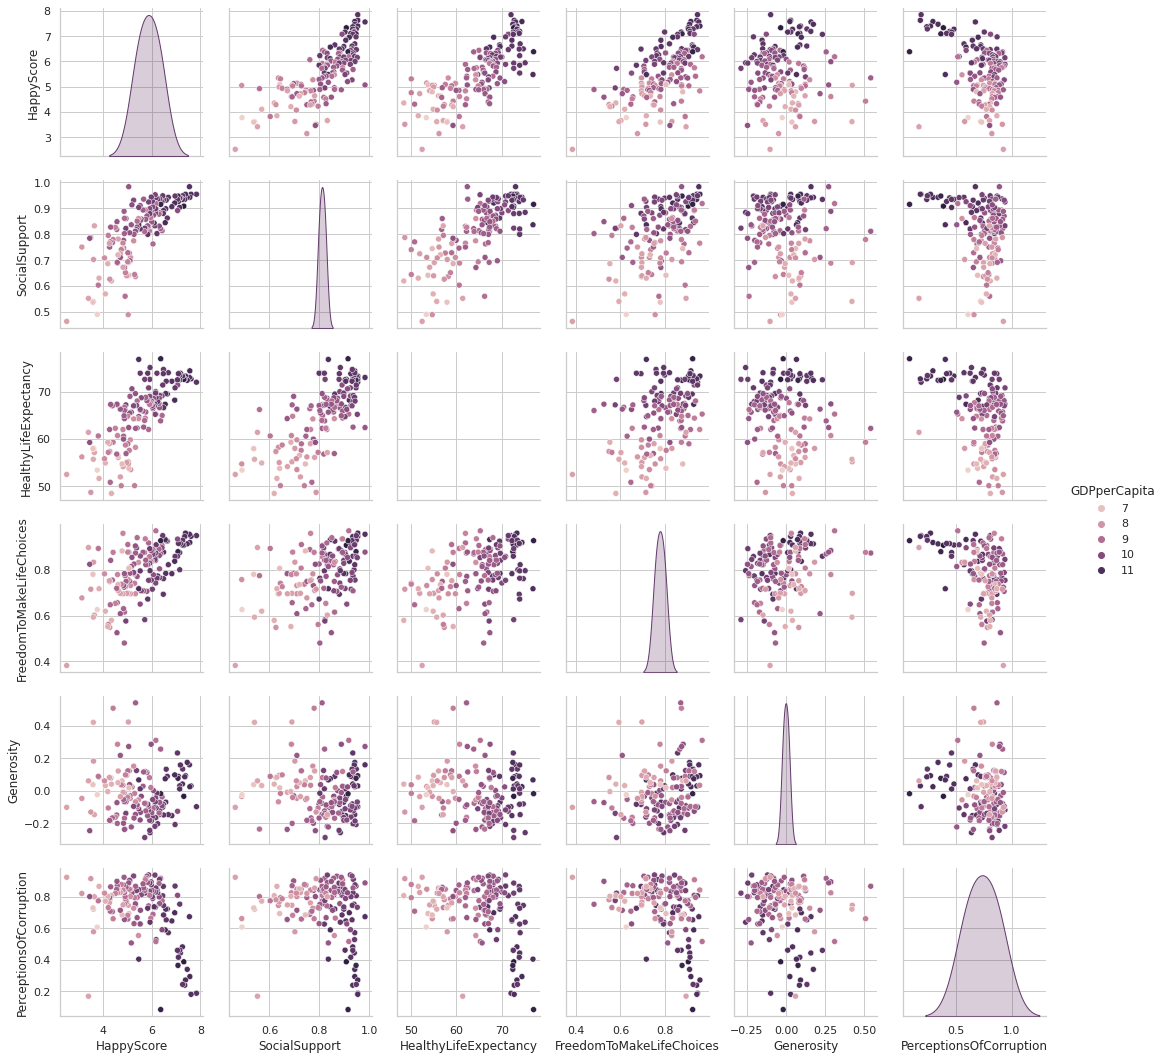

In [89]:
sb.pairplot(data, hue='GDPperCapita')

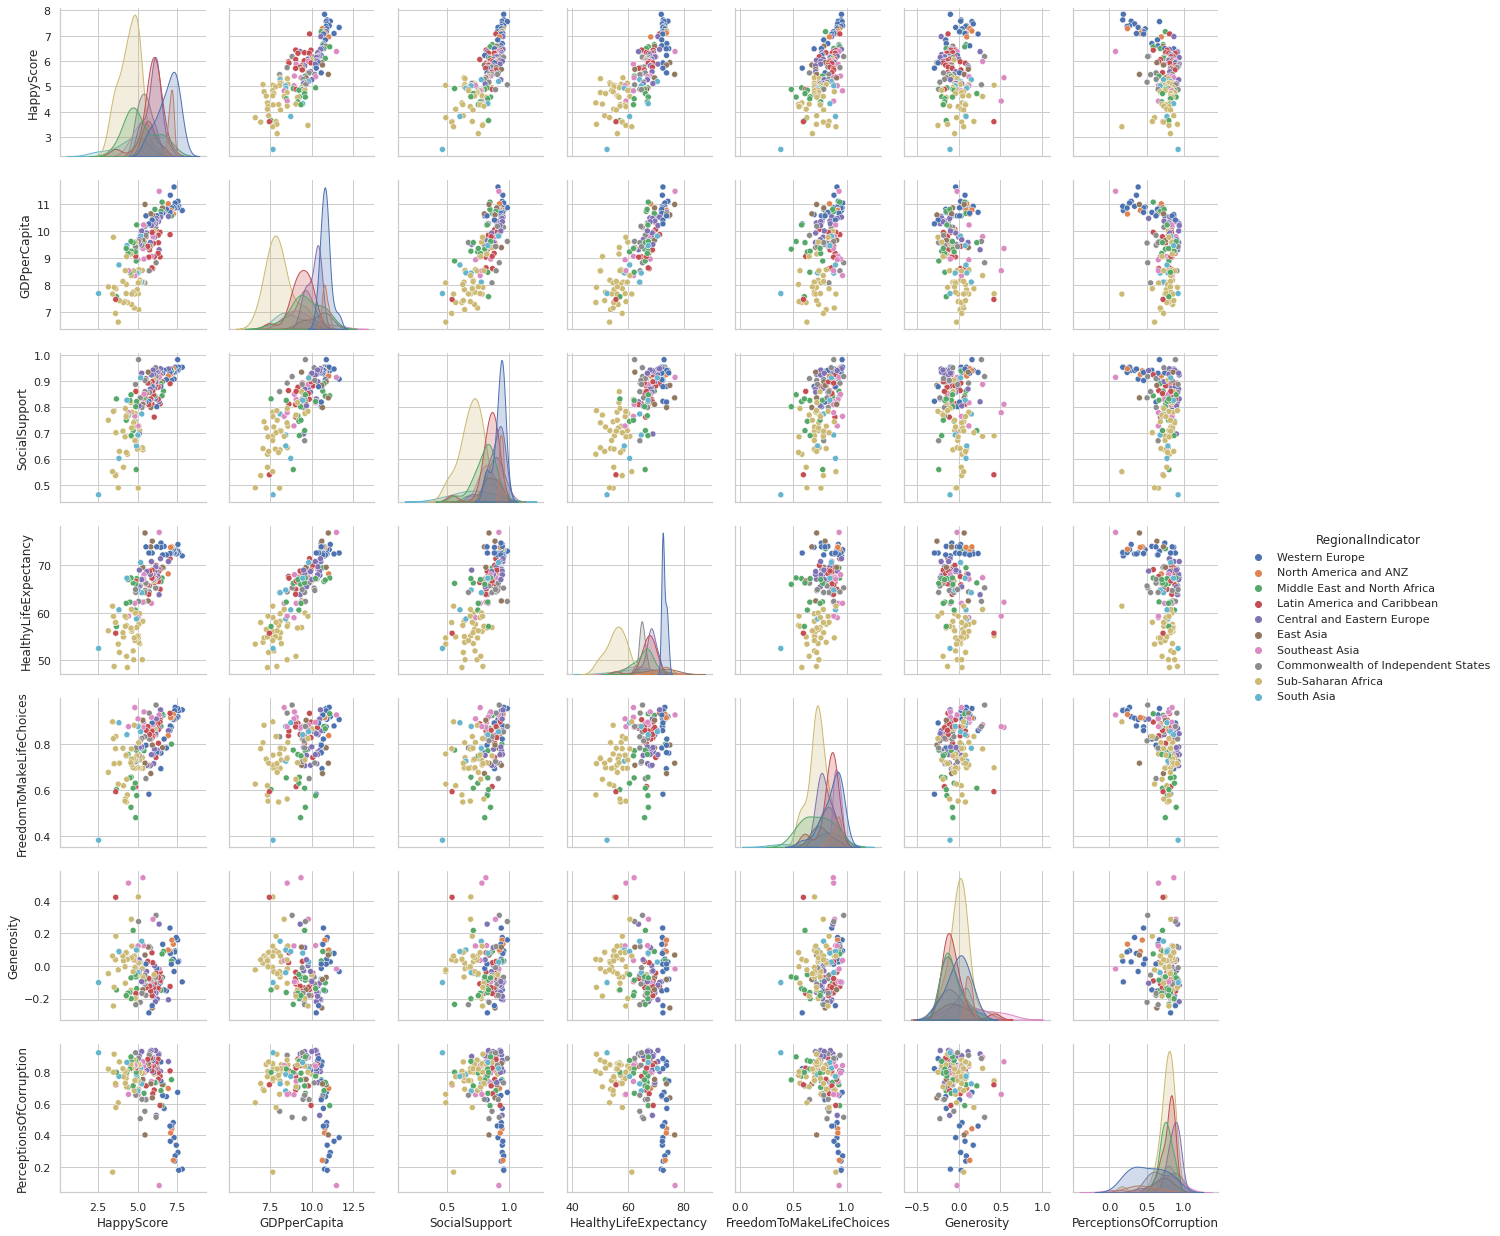

In [90]:
sb.pairplot(data, hue='RegionalIndicator')

**Let us examine the intersing correlations one on one**

In [91]:
data.columns

Index(['CountryName', 'RegionalIndicator', 'HappyScore', 'GDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancy', 'FreedomToMakeLifeChoices',
       'Generosity', 'PerceptionsOfCorruption'],
      dtype='object')

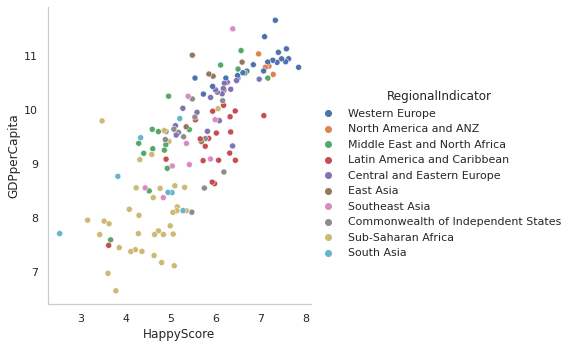

In [93]:
sb.relplot(x = 'HappyScore', y= 'GDPperCapita', hue='RegionalIndicator', data=data)

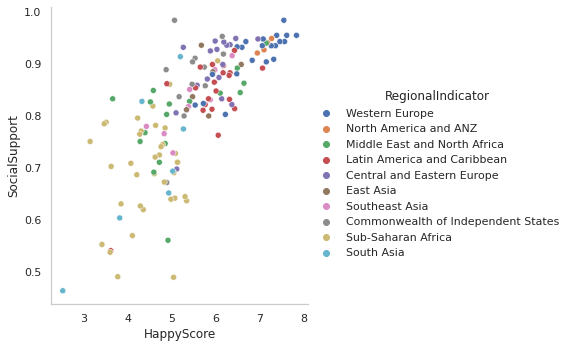

In [94]:
sb.relplot(x = 'HappyScore', y= 'SocialSupport', hue='RegionalIndicator', data=data)

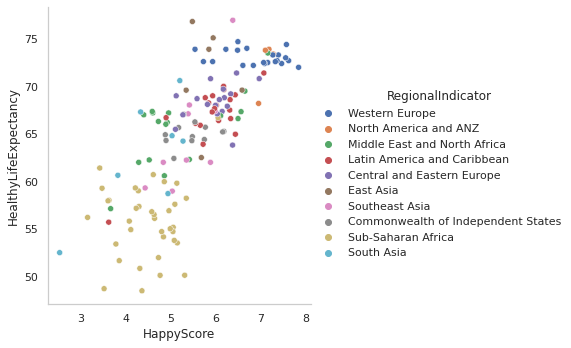

In [95]:
sb.relplot(x = 'HappyScore', y= 'HealthyLifeExpectancy', hue='RegionalIndicator', data=data)

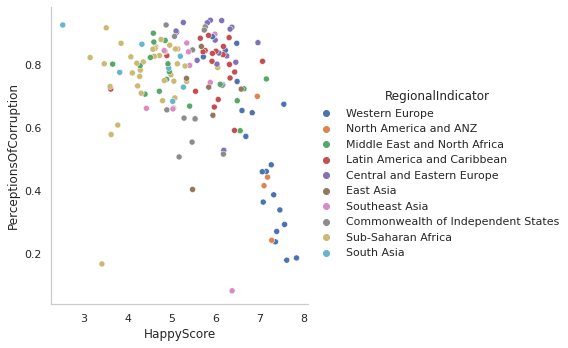

In [96]:
sb.relplot(x = 'HappyScore', y= 'PerceptionsOfCorruption', hue='RegionalIndicator', data=data)

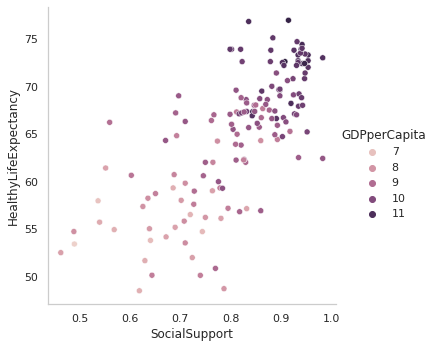

In [97]:
sb.relplot(x = 'SocialSupport', y= 'HealthyLifeExpectancy', hue='GDPperCapita', data=data)

We see a corroboration of our conviction that the social support, healthy life expectncy and the GDP per capital we all in positive corelation wrt each other

In [98]:
data.columns

Index(['CountryName', 'RegionalIndicator', 'HappyScore', 'GDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancy', 'FreedomToMakeLifeChoices',
       'Generosity', 'PerceptionsOfCorruption'],
      dtype='object')

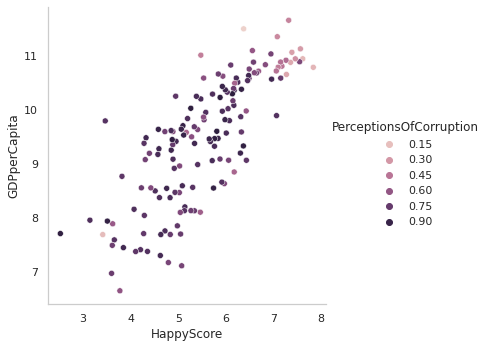

In [99]:
sb.relplot(x = 'HappyScore', y= 'GDPperCapita', hue='PerceptionsOfCorruption', data=data)

we see an abberation here. despite the perceptions of corruptions ebing higher for nearly all the countries in the middle of the spectrum, we see that they still score higher on the happy score. This could point to the fact that the GDP per capital matters signficiantly more than the corruption perception

This same overpowering the corruption trend continues by the social support and the healthy life factors

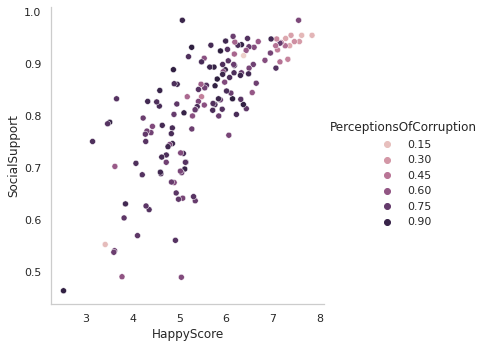

In [100]:
sb.relplot(x = 'HappyScore', y= 'SocialSupport', hue='PerceptionsOfCorruption', data=data)

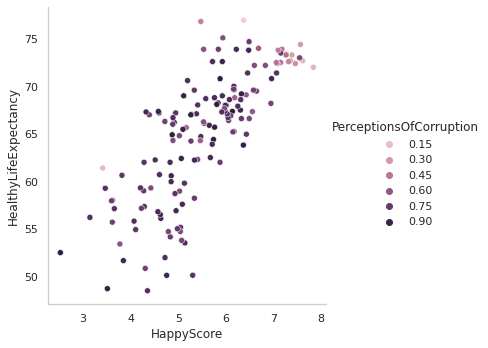

In [101]:
sb.relplot(x = 'HappyScore', y= 'HealthyLifeExpectancy', hue='PerceptionsOfCorruption', data=data)

the overpowering is significantly more pronounced here

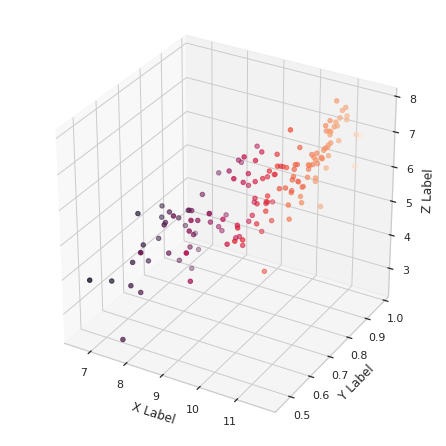

In [92]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

z = data['HappyScore']
x = data['GDPperCapita']
y = data['SocialSupport']


ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()